In [34]:
import pandas as pd
import numpy as np      
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [35]:
trn=pd.read_csv("/content/stocknet_trn_data.csv")

In [36]:
trn.info

<bound method DataFrame.info of              Open        High         Low    Volume
0       75.430000   75.910004   75.139999   3436700
1      124.930000  124.940002  124.169998   2366700
2       84.339996   84.370003   82.370003  11338700
3       56.770000   57.150002   56.529999    413300
4       47.419998   48.090000   46.759998   9531100
...           ...         ...         ...       ...
97724  103.650002  103.809998  103.089996   3678200
97725   64.419998   64.730003   64.190002  20273100
97726  581.070007  581.400024  571.070007   3416500
97727  120.650002  120.650002  114.959999  13261700
97728   64.870003   64.959999   64.309998    667000

[97729 rows x 4 columns]>

<Axes: >

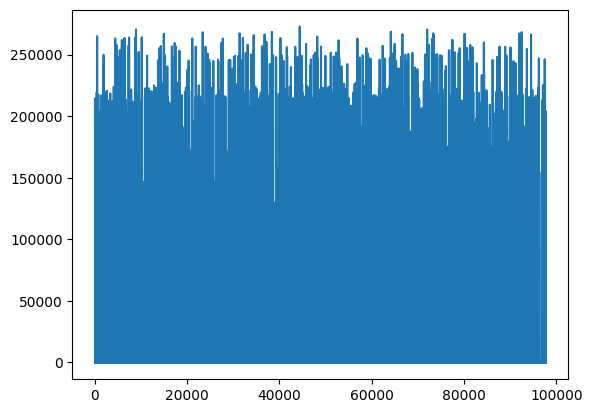

In [37]:
open= trn['Open']
open.plot()

In [38]:
tst=pd.read_csv("/content/stocknet_tst_data.csv")

In [39]:
tst.info

<bound method DataFrame.info of              Open        High         Low    Volume
0       26.299999   26.520000   25.959999  32642100
1       95.550003   95.739998   94.019997   1826300
2       54.770000   55.360001   54.590000   5656800
3      125.589996  125.820000  123.660004   4151600
4       20.709999   20.809999   20.670000  10489800
...           ...         ...         ...       ...
10855   51.660000   52.919998   49.919998     87000
10856   39.549999   40.619999   39.189999  35177200
10857   22.780001   22.900000   22.389999   9404100
10858   33.750000   34.060001   33.580002  26179000
10859   91.010002   91.680000   89.970001   4675300

[10860 rows x 4 columns]>

<bound method Series.info of 0         75.650002
1        124.449997
2         82.660004
3         57.009998
4         47.860001
            ...    
97724    103.230003
97725     64.620003
97726    575.140015
97727    115.400002
97728     64.720001
Name: 1, Length: 97729, dtype: float64>

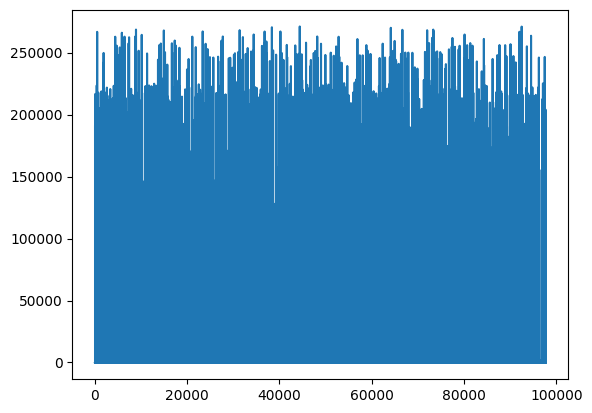

In [40]:
trn = pd.read_csv('stocknet_trn_data.csv')

trgt = pd.read_csv('targets.csv', header= None)

tgt = trgt.iloc[:, 1]


# Load the test data
tst = pd.read_csv('stocknet_tst_data.csv')
tgt.plot(x='number', y='closing price')
tgt.info

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(trn, tgt, test_size=0.2, random_state=42)


In [42]:
# Initialize an array to store the mean squared errors for each fold

kf = KFold(n_splits=10, shuffle=True, random_state=42)
# Loop over each fold and train/test a model
for train_idx, test_idx in kf.split(trn):
    # Split the data into training and testing sets for this fold
    X_train, X_test, y_train, y_test = train_test_split(trn, tgt, test_size=0.2, random_state=42)

In [43]:
model = LinearRegression()




# Fit the model with the training data and targets
model.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = model.predict(X_test)




In [44]:
pipe = Pipeline([
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression())
])

In [48]:
mse_scores = -cross_val_score(pipe, X_train, y_train, cv=10, scoring='neg_mean_squared_error')
mse_mean=np.mean(mse_scores)


# Calculate the root mean squared error (RMSE) of the model
rmse = np.sqrt(mse_mean)

# Calculate the mean absolute error (MAE) of the model
mae_scores = -cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mae_mean = np.mean(mae_scores)
linr2 = r2_score(y_test, y_pred)
print("R-squared:", linr2)
# Print the performance metrics of the model
print('MSE:', mse_mean)
print('RMSE:', rmse)
print('MAE:', mae_mean)


R-squared: 0.9999912850197161
MSE: 5397.816056955237
RMSE: 73.46983093049307
MAE: 6.3053644574662835


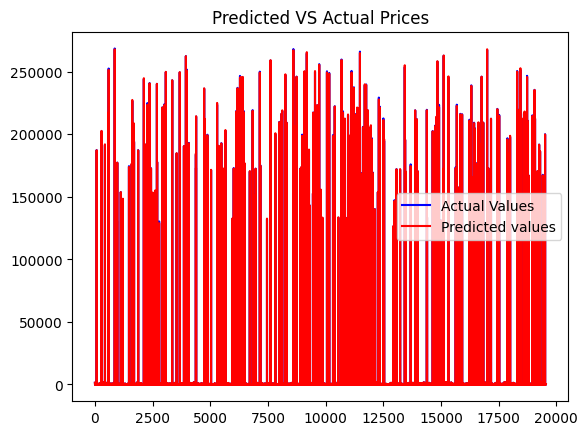

In [20]:
plt.plot(y_test.values, color="blue", label="Actual Values")
plt.plot(y_pred, color="red", label="Predicted values")




# Set the title and axis labels for the plot
plt.legend()
plt.title("Predicted VS Actual Prices")

plt.show()

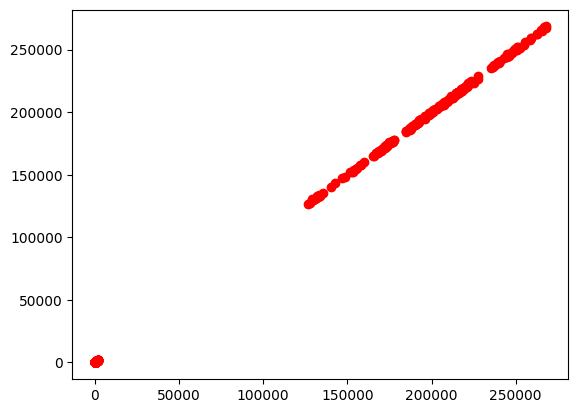

In [21]:

plt.scatter(y_pred,y_test.values,color="red")

In [22]:
y_pred


array([1356.73832604,  100.61683094,   58.44864233, ...,   71.74547402,
         26.61336218,   75.1782597 ])

In [23]:
y_test.values

array([1357.790039,  101.209999,   58.810001, ...,   71.809998,
         26.75    ,   75.160004])

In [24]:
score = model.score(X_train, y_train)
score

0.999988675498941

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=200, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(trn, tgt, test_size=0.2, random_state=42)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the model with the training data and targets
rfg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rfg.predict(X_test)

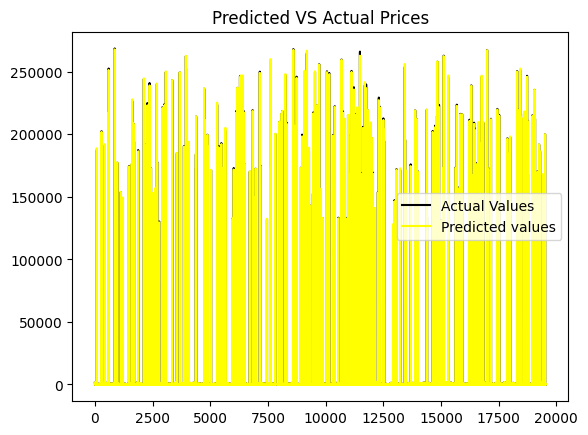

In [ ]:
plt.plot(y_test.values, color="black", label="Actual Values")
plt.plot(y_pred, color="yellow", label="Predicted values")

# Create a line plot of the second set of values with a red color


# Set the title and axis labels for the plot
plt.title("Predicted VS Actual Prices")
plt.legend()
plt.show()

In [ ]:
y_pred

array([1353.72539047,  100.63160361,   58.40796254, ...,   71.77066785,
         26.54303497,   74.98330494])

In [ ]:
y_test.values

array([1357.790039,  101.209999,   58.810001, ...,   71.809998,
         26.75    ,   75.160004])

In [ ]:
score = rfg.score(X_train, y_train)
score

0.9999974410693266

In [49]:
mse_scores = -cross_val_score(rfg, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_mean = np.mean(mse_scores)

# Calculate the root mean squared error (RMSE) of the model
rmse = np.sqrt(mse_mean)

# Calculate the mean absolute error (MAE) of the model
mae_scores = -cross_val_score(rfg, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mae_mean = np.mean(mae_scores)

# Calculate the R-squared score of the model
rfgr2 = r2_score(y_test, y_pred)

# Print the performance metrics of the model
print('MSE:', mse_mean)
print('RMSE:', rmse)
print('MAE:', mae_mean)
print("R-squared:", rfgr2)

KeyboardInterrupt: ignored

In [26]:


import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [27]:
X_train, X_test, y_train, y_test = train_test_split(trn, tgt, test_size=0.2, random_state=42)

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [29]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [30]:
y_pred = svr.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse_scores = -cross_val_score(svr, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_mean = np.mean(mse_scores)

# Calculate the root mean squared error (RMSE) of the model
rmse = np.sqrt(mse_mean)
svmr2=r2_score(y_test,y_pred)
# Calculate the mean absolute error (MAE) of the model
mae_scores = -cross_val_score(svr, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mae_mean = np.mean(mae_scores)
print("R2 score:", svmr2)
print("MAE:", mae_mean)
print("MSE:", mse_mean)
print("RMSE:", rmse)


R2 score: 0.9995496365587235
MAE: 21.640532298636344
MSE: 48307.188175152856
RMSE: 219.78896281468016


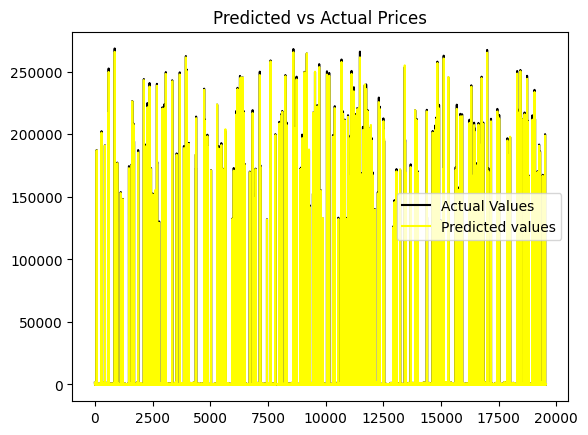

In [ ]:
plt.plot(y_test.values, color="black", label="Actual Values")
plt.plot(y_pred, color="yellow", label="Predicted values")

plt.title("Predicted vs Actual Prices")
plt.legend()
plt.show()

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


In [11]:

param_grid = {
    'n_estimators': [100, 200,300],
    'max_depth': [ 7, 9,11],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [6, 8, 10],
    #'max_features' : [12, 15, 18]
    }

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(RandomForestRegressor(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

NameError: ignored

In [15]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor(n_estimators=300, max_depth = 11, min_samples_leaf=3, min_samples_split=6, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(trn, tgt, test_size=0.2, random_state=42)


kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Fit the model with the training data and targets
rfg.fit(X_train, y_train)

# Use the model to make predictions on the test data
y_pred = rfg.predict(X_test)

In [18]:

 from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse_scores = -cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_mean = np.mean(mse_scores)

# Calculate the root mean squared error (RMSE) of the model
rmse = np.sqrt(mse_mean)
rfgr2=r2_score(y_test,y_pred)
# Calculate the mean absolute error (MAE) of the model
mae_scores = -cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mae_mean = np.mean(mae_scores)
print("R2 score:", rfgr2)
print("MAE:", mae_mean)
print("MSE:", mse_mean)
print("RMSE:", rmse)

NameError: ignored

In [32]:
param_grid = {
    'kernel': ['linear','poly', 'rbf', 'sigmoid'],
    'C': [1.0,1.5,2.0],
    'gamma': [0.1, 1, 'scale', 'auto'],
    #'epsilon': [0.01, 0.02, 0.025]
}

In [33]:
grid_search = GridSearchCV(SVR(),
                           param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

KeyboardInterrupt: ignored

In [ ]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
mse_scores = -cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
mse_mean = np.mean(mse_scores)

# Calculate the root mean squared error (RMSE) of the model
rmse = np.sqrt(mse_mean)
svmr2=r2_score(y_test,y_pred)
# Calculate the mean absolute error (MAE) of the model
mae_scores = -cross_val_score(grid_search, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
mae_mean = np.mean(mae_scores)
print("R2 score:", svmr2)
print("MAE:", mae_mean)
print("MSE:", mse_mean)
print("RMSE:", rmse)

In [ ]:
plt.plot(y_test.values, color="black", label="Actual Values")
plt.plot(y_pred, color="yellow", label="Predicted values")

plt.title("Predicted vs Actual Prices")
plt.legend()
plt.show()